Part2 主要是分析2016年MLB棒球常規賽的部分數據

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
df = pd.read_csv('baseball_reference_2016_clean.csv')

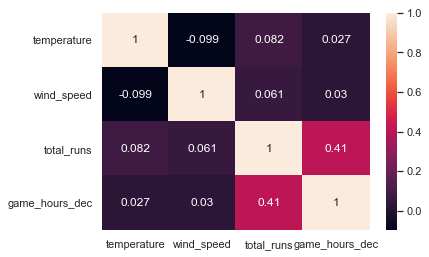

In [89]:
df_features = df.loc[:, ['temperature', 'wind_speed', 'total_runs', 'game_hours_dec']]
import seaborn as sns
sns.set()
sns.heatmap(df_features.corr(), annot=True)

這主要是說，分析關於 1.氣溫 2.風速 3.總共得分 4.比賽時間的相關性，而我們可以清楚的看到氣溫跟風速能影響的總比分與時間長度有限，而大量的得分會嚴重的影響時間的長度

<BarContainer object of 30 artists>

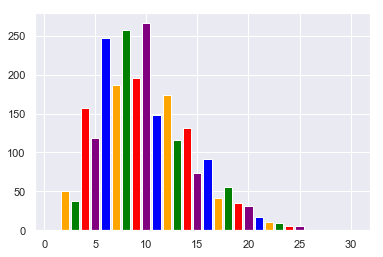

In [90]:
df_series = df.loc[:,'total_runs']
number = []
for element in df_series:
    if element not in number:
        number.append(element)
#arr = np.array([0,0,0,0,0])
arr = []
for i in range(max(number)+1):
    arr.append(0)
key = []
for element in df_series:
    arr[element] += 1
length = len(arr)
for i in range(length):
    key.append(i+1)
plt.bar(key,arr,color=['blue', 'orange', 'green', 'red', 'purple'])

這張圖是說明的總得分的分布，因為一定會有人贏，所以總得分0為0場，而最多單場總得分為29分，基本上大致的得分分布為4至10分左右，而這區間也占了數據的大多數

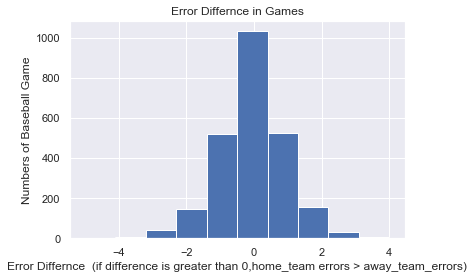

In [91]:
import math as mt
df_err = df.loc[:,['away_team_errors' ,'home_team_errors']]
diff = df_err['home_team_errors'] - df_err['away_team_errors']
#Ratio = df_err['away_team_errors'] / df_err['home_team_errors']
#Ratio.replace(np.inf,-1,inplace=True)
#Ratio.replace(np.nan,-2,inplace=True)
plt.xlabel('Error Differnce  (if difference is greater than 0,home_team errors > away_team_errors)')
plt.ylabel('Numbers of Baseball Game')
plt.title('Error Differnce in Games')
plt.hist(diff.fillna(-1));

這主要是分析，主客場的差異部分，就大眾認知而言，運動有主客場因素，不像籃球或是足球有統一規定球場大小，棒球場每間有獨自的風格與規定，30間棒球場有30種不同的場地，而這也可能會影響棒球員在場上失誤的可能性，而不過如上表分析，0為失誤次數一樣，大於0為主場球員失誤較多，而小於0則客場球員失誤較多，而這張圖實際上差異性不大，也就是說，在頂尖棒球員身上，主客場的場地因素影響可能沒有想像中的那麼大。